So far we've been ignoring the date column, but it's interesting to see the trends with time 

In [ ]:
bkg_sample_df['local_date'] = pd.to_datetime(bkg_sample_df['local_date'])
bkg_sample_df['local_date'] = pd.to_datetime(bkg_sample_df['local_date'])
bkg_sample_df['local_date'] = pd.to_datetime(bkg_sample_df['local_date'])

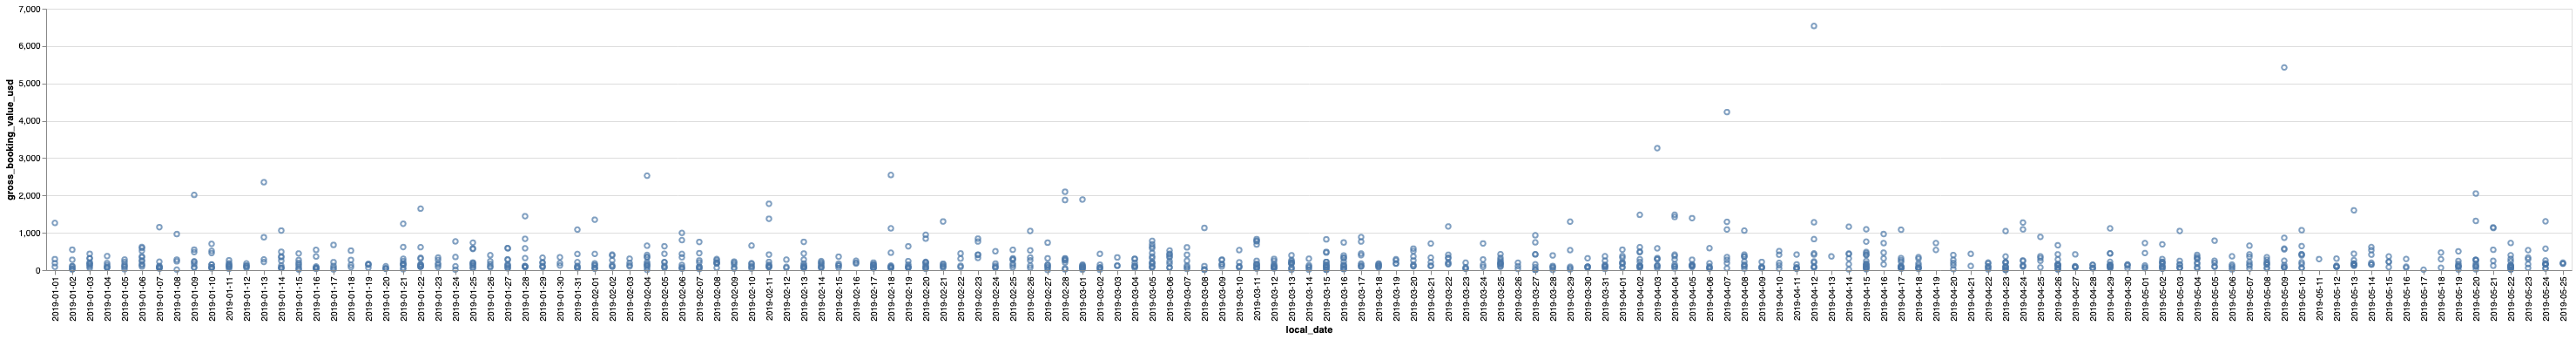

In [99]:
alt.Chart(bkg_sample_df).mark_point().encode(
    x='local_date',
    y='gross_booking_value_usd'
)

We can bin the local date column by month using the month() aggregation function.

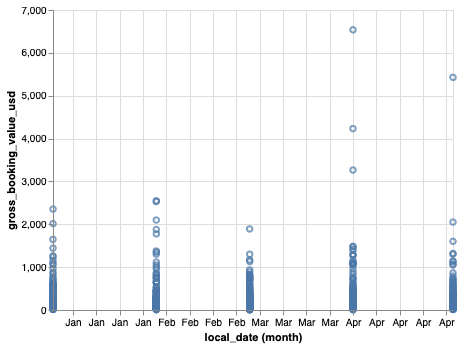

In [115]:
alt.Chart(bkg_sample_df).mark_point().encode(
    x=alt.X('month(local_date)'),
    y='gross_booking_value_usd:Q'
)

Each month has a lot of bookings and therefore overlap in the Chart. We can clean this up a bit by plotting the median at each x value.

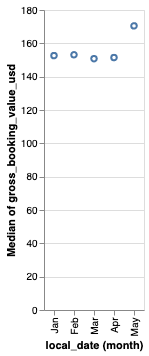

In [111]:
alt.Chart(bkg_sample_df).mark_point().encode(
    x=alt.X('local_date', timeUnit='month'), # more verbose syntax
    y='median(gross_booking_value_usd)'
)

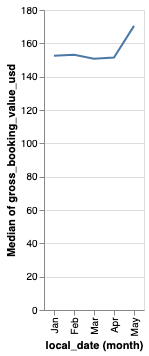

In [112]:
alt.Chart(bkg_sample_df).mark_line().encode(
    x=alt.X('local_date', timeUnit='month'),
    y='median(gross_booking_value_usd)'
)

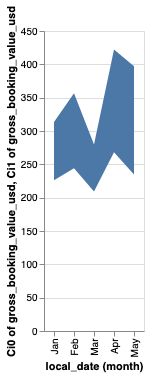

In [113]:
alt.Chart(bkg_sample_df).mark_area().encode(
    x=alt.X('local_date', timeUnit='month'),
    y='ci0(gross_booking_value_usd)',
    y2='ci1(gross_booking_value_usd)'
)

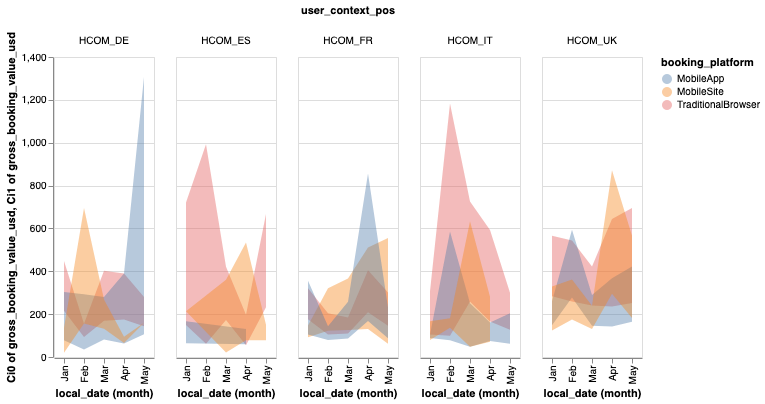

In [118]:
alt.Chart(bkg_sample_df).mark_area(opacity=0.4).encode(
    x=alt.X('local_date', timeUnit='month'),
    #x=alt.X('local_date', timeUnit='month', axis=alt.Axis(tickCount=5)),
    y='ci0(gross_booking_value_usd)',
    y2='ci1(gross_booking_value_usd)',
    color='booking_platform',
    column='user_context_pos'
)

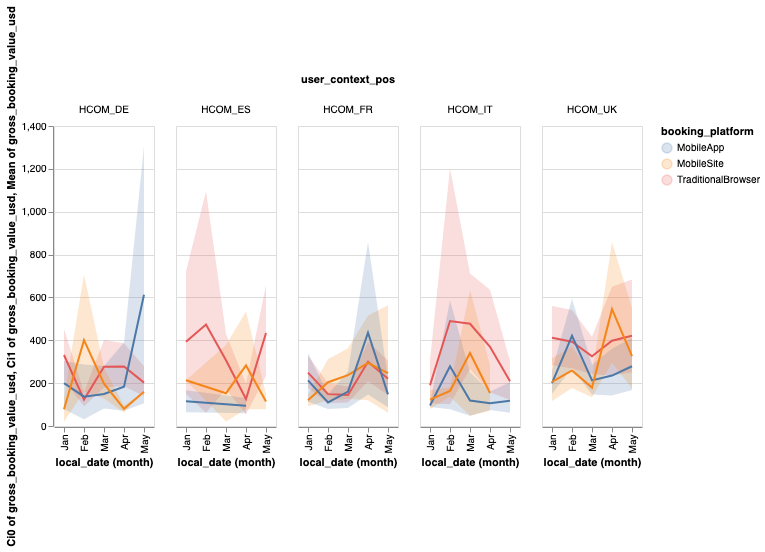

In [127]:
conf = alt.Chart().mark_area(opacity=0.2).encode(
    x=alt.X('local_date', timeUnit='month'),
    y='ci0(gross_booking_value_usd)',
    y2='ci1(gross_booking_value_usd)',
    color='booking_platform'
)

lines = alt.Chart().mark_line().encode(
    x=alt.X('local_date', timeUnit='month'),
    y='mean(gross_booking_value_usd)',
    color='booking_platform'
)

alt.layer(conf, lines, data=bkg_sample_df).facet(column='user_context_pos')